In [ ]:
import matplotlib.pyplot as plt
import pandas
import seaborn
import numpy
import warnings
import random
import matplotlib as mpl
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# %% Leitura de dados ===================================================
missing_values = ["?"]
df = pandas.read_csv("cogumelos.csv", sep=',', na_values = missing_values)#, na_values = missing_values

In [ ]:
#%% maybe drop this First, the veil-type variable has only one value, 'p', meaning, every mushroom has the same veil-type. And because, every mushrrom has that same veil-type: that column doesn't tell us anything useful - so we can drop that column.
df.drop(['veil-type'], axis=1, inplace=True)
# Excluindo também a variável 'stalk-root", que apresenta dados nulos
df.drop(['stalk-root'], axis=1, inplace=True)


Análise exploratória de dados

In [ ]:
#%% verificar soma de cada atributo em parametro e plotar graficos
for attr in df.columns:
    print('\n*', attr, '*')
    print(df[attr].value_counts())
    plt.figure()
    seaborn.countplot(df[attr])

([<matplotlib.patches.Wedge at 0x7f78d9e0bc90>,
 [Text(-0.11476344198936864, 1.0939969617794891, 'Comestível'),
  Text(0.12519637043125123, -1.1934512427539052, 'Venenoso')],
 [Text(-0.06259824108511015, 0.5967256155160849, '53.33%'),
  Text(0.07303121608489654, -0.6961798916064448, '46.67%')])

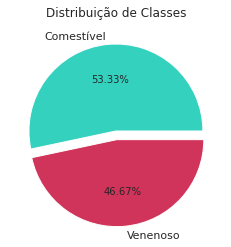

In [ ]:
# %% Distribuição ===================================================
x = df['y'].value_counts().to_list()
colors = ['#D1345B','#34D1BF']
labels = ["Comestível", "Venenoso"]
plt.title('Distribuição de Classes')
plt.pie(x, labels=labels, autopct="%1.2f%%", colors=colors[::-1], explode=[0, 0.1])


ANÁLISE DE MODELOS
---



In [ ]:
import random
from sklearn.preprocessing import LabelEncoder

Convertendo dados categóricos em numéricos esparsos

In [ ]:
#%% encode 2 valued columns  ** Transformando dados de variáveis binárias em números
for col in df.columns:
    if len(df[col].value_counts()) == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

#%% drop result (class)
result = df['y']
df.drop(['y'], inplace=True, axis = 1)

# Convertendo dados categóricos da classificação (y) em numéricos
for col in result:
        le2 = LabelEncoder()
        result = le2.fit_transform(result)

#%% one hot encoding - codificação esparça
#Definindo variaveis categoricas. 
cat = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']].copy()

for item in cat:
    # assigning the encoded df into a new dfFrame object
    df1 = pandas.get_dummies(df[item], prefix=item)
    df = df.drop(item, axis=1)
    for categorial_feature in df1.columns:
        #Set the new column in df to have corresponding df values
        df[categorial_feature] = df1[categorial_feature]
        

In [ ]:
#Descobri que nao da pra usar Validação Cruzada em Cluster, entao fica assim
from sklearn.model_selection import train_test_split

#split 70/30, sem Y
X_train, X_test, Y_train, Y_test = train_test_split(df, result, test_size= 0.3, random_state=50)
print("Observações em Treino", len(X_train))
print("Observações em Teste", len(X_test))
print("Linhas Totais", len(result))

Observações em Treino 5891
Observações em Teste 2525
Linhas Totais 8416


Análise de Outliers (precisa desenvolver)

In [ ]:
#Outliers

In [ ]:
#Correlação >95

Aplicando clusterização K-means

In [ ]:
from sklearn.cluster import KMeans

x_2d = X_train

nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters, random_state=0)
km.fit(x_2d)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_test)

# Y_means = km.fit(Y_test)
# print("Y K-Means",len(y_cluster_kmeans))
# print("Y True", len(Y_train))

In [ ]:
!pip install minisom

In [ ]:
# SOM
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

# display matplotlib plots in notebook
%matplotlib inline

In [ ]:
# initialization and training of 15x15 SOM
data = X_train.to_numpy()

som = MiniSom(15, 15, data.shape[1], sigma=1.5, learning_rate=.5, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)

som.train(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.8693503294114222


In [ ]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()
t = Y_train

In [ ]:
def classify(som, data, class_assignments):
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [ ]:
class_assignments = som.labels_map(X_test.to_numpy(), Y_test)
Y_SOM_result = classify(som, X_test.to_numpy(), class_assignments)

In [ ]:
#PLOT MONSTRUOSO DO HEXAGONO QUE EU NÃO FAÇO IDEIA DO QUE SIGNIFICA MAS TODA UTILIZAÇÃO DE SOM FAZ ISSO
#PRECISO DESCOBRIR AINDA SE 0 = EDIBLE?????? NAO FAÇO IDEIA

# Eu perguntei a ele na aula.  Para usar esse hexágono, temos que saber se um hexágono classificado como 0 
# junta quais amostras da base, e a partir deste grupo, ver se são comestíveis ou venenosos.  Esse é o problema!
# Por essa razão que não quiz usar o MINISOM!  Achei a versão do sklearn melhor.  Acho que podemos usar este, se você 
# implementar o teste de silheta nele, demonstrando, pelo menos mais eficiência.

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy, 
             markers[t[cnt]-1], 
             markerfacecolor='None',
             markeredgecolor=colors[t[cnt]-1], 
             markersize=12, 
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='0',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   #Line2D([0], [0], marker='+', color='C1', label='Rosa',
                   #markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='1',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

#plt.savefig('resulting_images/som_seed_hex.png')
plt.show()

Análise de qualidade do classificador

In [ ]:
# Utilizando "adjusted Rand score" ou Taxa de acerto ajustada - mede a similaridade entre a classe (y) da base e
# a classificação (result). 

# Em classificação pobre, o score será negativo ou próximo de 0 

# see http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score_kmeans = adjusted_rand_score(Y_test, y_cluster_kmeans)
score_som = adjusted_rand_score(Y_test, Y_SOM_result)
print("Rand Score K-Means: ",score_kmeans)
print("Rand Score SOM: ",score_som)

Rand Score K-Means:  0.5955951122529463
Rand Score SOM:  0.9826432472178013


Coeficiente de Silhueta

In [ ]:
# De https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
# O score é limitado entre -1 e +1

from sklearn.metrics import pairwise_distances
from sklearn import metrics
score_kmeans = metrics.silhouette_score(X_test, y_cluster_kmeans, metric='euclidean')
score_SOM    = metrics.silhouette_score(X_test, Y_SOM_result, metric='euclidean')
print("Silhouette Score K-means: ",score_kmeans)
print("Silhouette Score SOM: ",score_SOM)

Silhouette Score K-means:  0.1595315884540729
Silhouette Score SOM:  0.11857659338293111


Utilizando Clusterização de modelo de mistura gaussiana (Gaussian Mixture Model - GMM) com todas as variáveis

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X)
y_cluster_gmm

In [ ]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'result')
plotData(df_plot, 'ClusterGMM')

Análise de qualidade do classificador

Taxa de Acerto ajustada do modelo de mistura gaussiana (Gaussian Mixture Model - GMM)

Avaliação de Silhueta do modelo de mistura gaussiana (Gaussian Mixture Model - GMM)

Utilizando clusterização por SOM

Calculando a relação m x n através das variâncias

In [ ]:
# x_2d.describe()
var1 = x_2d.PC1.var(axis=0)
var2 = x_2d.PC2.var(axis=0)
var = var1/var2
rel = numpy.sqrt(x_2d.PC1.var(axis=0) / x_2d.PC2.var(axis=0))
print(rel)

In [ ]:
##
# FALTA PRE PROCESSAMENTO (??) - ANALISAR OUTLIER E DADOS FALTANTES (não consegui concluir)
# FALTA COLOCAR MATRIZ DE CONFUSÃO 

        Introdução, motivação ao uso.
        Classificadores, Classificação por similaridade
        Aprendizado Supervisionado e Não Supervisionado
        Clusterização, propriedades das classes 
        Geração de padrões e classificação 
        Clusterização, processos clássicos


 Redes Neurais em Clusterização 
 Quantização Vetorial 
 Ruído 
 Camada de Kohonen Simplificada 
 Rede ART  Counterpropagation 
 Classes não esféricas 
 SOM
 Pré-processamento 
 Demonstrativos e exemplos

1) CLASSIFICADOR PRECISA DE CODIFICAÇÃO ESPARSA NA SAIDA SE É MAIS DE 2, NO NOSSO CASO É BINARIO. 
2) criterio de similaridade (usar esse termo falando de clusterização)
	2.1) Determinar classes e classificar as entradas
3) Minimizar a dispersão intra classe total (???????)
4) Precisamos (mesmo sabendo já) adicionar uma heuristica do treinamento com o "agrupamento natural) 
	4.1) um agrupamento “natural” (um número N “bom” de classes) é alcançado na vizinhança imediata de uma grande variação em Fin.
	4.2) precisa analisar a dispersão total
	4.3) explicar kmeans, reclassificar entradas e atualizar os centros.
		5) baricentro é escolhido como padrao pra minimizar dissimilaridade e o erro de represent.
	4.4) algum algoritmo hierárquico pra comparar?

5) Criterio de separação usado? hiperplanos: (diagrama) de Voronoi
	5.1) Usamos o criterio de similaridade minima (ou maxima) + hiperplano

6) PRECISA ver esse negocio de dispersão, erro RMS de representação e FIN a minimizar.

7) Uma classe pode ter subclasse
	7.1) Caso nao supervisionado: identificar o RUIDO do cluster. p(x)
	7.2) precisa tratar o ruido 
	7.3) branqueamento do ruido VER PG. 6
	7.4) O uso de PCA sugere a eliminação de componentes pouco relevantes, i.e., com pequenos

7 - PRECISAMOS FAZER GRAFICO DE BARRAS MOSTRANDO A QUANTIDADE DE CADA CLASSE, DISTRIBUIÇÃO ETC

10) KOHONEN - apenas o neuronio vencedor treina.  (SOM) mapas auto organizaveis de hkohonem
	10.1) POS TREINAMENTO - neuronios pouco (ou nao) treinados ou sem população, retirar
	b) classes com baixa população, verificar se tiveram um padrao?
	c) ver se algum neuronio esta partilhando a mesma classe?
	d) ver se um neuronio está em duas classes?

11) SOM - criterios de pertinencia - competitividade por quem vai treinar
	11.1) maior similaridade com o baricentro (sinapses)
	b) neuronio como medidor de similaridade. 
	c) CONSCIENCIA???????


15) explicação de SOM
	1) tentar identificar as 3 fases no trabalho.
		a) verifica o neuronio ganhador
		b) verifica os vizinhos de Ni 
		c) atualizar as sinapses dos vizinhos
	2) tem heuristica pra dimensionar o mapa neuronioos (N = 5*raiz(n)) - numero de instancias
	
	PCA - compactação linear
	SOM - compactação nao linear 
	P/Q - utilizando componentes de PCA (variancia 1/variancia2) (das classes, acho)

Essas pra quadrados:
	METRICAS: distancia (quadrados) de um neuronio ao outro
	MANHATTAN = 
	DISTANCIA EUCLIDIANA: 

Essas pra hexagonal: 
	Distancia euclidiana;
	

	POS: verificar a matriz das distancias (umatrix) - VER se as classes ficaram bem definidas. 


16) Pre processamento - 
	16.1) escolha variaveis de entrada
		relevancia é vista no pos processamento, comparando as classes.
 
	2) compactação/parametrização
		PCA - transformada matematica. 

	3) escalamento n precisa pq é categoricas

	1.2) analise estatistica: analisar a distribuição das variaveis em cada dimensão.
		Em histograma de valores de classes. (asssociação de modas)

	CATEGORICAS: binarias e nominais, maximamente esparsa OK


	VALDIAÇÂO CRUZADA: treinamento e teste, sem validação. 



17) POS processamento
	Verificar Fin e dispersão.

SOM:

RESULTADOS: tabela de confusão. 
	Erro de classificação. 
	Sensibilidade 
	Especificidade



ANALISE DE ERROS: 
	OUTLIERS - eliminar
	BAIXA POPULAÇÂO (ponderar erros)


RELEVANCIA DAS ENTRADAS: em um classificador uma entrada é muito relevante se sua ausência provoca um percentual elevado de modificações nas saídas (na classificação) para o conjunto das P entradas disponíveis.
	ELIMINAR ENTRADAS COM BAIXA RELEVANCIA
	retreinar rede podada.
	

REFERENCIAS

1 – Duda, R.O.; Hart, P.E.; Stork, D.G., "Pattern Classification”, Wiley, 2001, Cap 10. 2 - Haykin, S., “Neural Networks and Learning machines”, Pearson, 2009 ou “Redes Neurais, Teoria e Prática”, Bookman, 2001, Cap. 8.1, 8.2, Cap. 9. 3 – Silva, I.; Spatti, D. e Flauzini, R. - "Redes Neurais Artificiais para Engenharia e Ciências Aplicadas", Artliber, 2010, cap 8-10. 4 -Wasserman, P. – “Neural Computing”, Van Nostrand Reinhold, 1989, Cap 4, 8. 5 - Duda, R.O., Hart, P.E.,"Pattern Classification and Scene Anal.”, Wiley, 1973, Cap 6 6 – Gersho, A., Gray, R.M. – “Vector Quantization and Signal Compression”, Kluwer, 1992, Part III.